## Vector-valued function with Random Fourier Features

### Imports

In [590]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

### Values

In [591]:

dimension = 2
sigma = 10
sigma2 = 2*sigma**2

# Random Fourier features
m = 20 # number of samples
w = np.array([randn(m) / sigma, randn(m) / sigma]) # w is the same size as the dimensions times the number of samples
b = np.random.rand(m)*2*np.pi # b is the same size as number of samples

n = 500 # number of points

x1 = randn(n)/2
x2 =  randn(n)/2
x_vector = np.array([x1, x2])
# x_vector = np.block([x1,x2])

noise = randn(n) * 1e-1
y1 = np.cos(x1) + noise
y2 = np.sin(x2) + noise

#y1 = 1+np.sin(x1/10) + x1**2 + noise
#y2 = 0.5 * x2**2 + np.exp(x2) + noise

y = []
for i in range(n):
    y.append(y1[i])
    y.append(y2[i])

y = np.array(y)

lam = 0.000001 # Regularization parameter

### Gaussian Kernel

In [592]:
def k_gauss(x, z):
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def k_matrix(x, z, dim):
    k = k_gauss(x, z)
    k_matrix = k *np.eye(dim)
    return k_matrix

def K_gauss(x, n, dim):
    K = np.zeros((dim*n, dim*n))
    for i in range(0, n):
        for j in range(0, n):
            k = k_gauss(x[:,i], x[:,j])
            K[i*dim][j*dim] = k
            K[i*dim+1][j*dim+1] = k
    return K

K = K_gauss(x_vector, n, dimension)

#### Alpha

In [593]:
# Returns a vector with length dim * n
def alpha(x, y, lam, n, dim):
    K = K_gauss(x, n, dim)
    alpha_vector = np.linalg.inv((K + lam*np.eye(dim*n))) @ y
    alpha_reshape = [alpha_vector[::2], alpha_vector[1::2]]
    return np.array(alpha_reshape)

alpha_ = alpha(x_vector, y, lam, n, dimension)
alpha_

array([[ 6.47521325e+03, -1.35888467e+05, -3.87630346e+04,
        -7.59069626e+04, -4.66805847e+04, -5.15213360e+04,
        -1.56890375e+04,  1.98003759e+05,  6.03108110e+04,
         1.13043378e+05, -3.83792870e+04, -8.20097947e+03,
         1.73203771e+04, -4.04995997e+04,  1.43903019e+05,
         6.84818021e+04,  1.02029258e+05, -1.03645563e+05,
         9.50239476e+04,  9.04333795e+04, -5.33631175e+04,
         1.55099661e+04,  9.40292335e+04, -3.73504138e+04,
         2.09143804e+04, -1.01635256e+05, -3.18511950e+04,
         3.26736879e+04, -1.21795767e+05,  4.10064300e+04,
        -3.07269615e+04,  9.28394231e+04,  1.98801969e+05,
        -1.30339226e+05,  8.65833067e+04,  1.07548408e+05,
        -1.68718968e+04, -1.69290046e+04, -8.70266432e+03,
        -1.28748134e+05, -1.63332317e+04, -4.98933404e+04,
         1.77549870e+05, -3.60204190e+04, -7.08826038e+04,
        -7.47182039e+04,  8.89480688e+04, -1.78669273e+03,
         1.48043069e+05, -1.43278032e+04, -7.60270178e+0

#### Estimated function

In [594]:
def estiamted_function(alpha, x, n, dim):
    function = np.zeros((2, n))
    for i in range(n):
        sum = np.zeros((2))
        x_i = x[:, i]
        for j in range(n):
            k = k_gauss(x_i, x[:, j])
            kernel = k*np.eye(dim)
            sum = sum + kernel@alpha[:, j]
        function[:, i] = sum 
    return function

func = estiamted_function(alpha_, x_vector, n, dimension)
func

array([[ 0.98361175,  0.98467718,  0.4109174 ,  0.99140981,  0.89887099,
         0.9760882 ,  0.96515777,  0.95419649,  0.86427736,  0.7717886 ,
         0.72999356,  0.94571885,  0.98315451,  0.65055126,  0.98853924,
         0.47481712,  0.99399782,  0.71173241,  0.87804735,  0.99974565,
         0.71830788,  0.80471577,  0.98958871,  0.79688934,  0.96361661,
         0.9949436 ,  0.82654567,  0.85820398,  0.88306267,  0.83742984,
         0.91171588,  0.91299965,  0.49334681,  0.85490988,  0.98513214,
         0.83761653,  0.92639939,  0.82196599,  0.85014135,  0.9797832 ,
         0.98596291,  0.99808262,  0.68291786,  0.44649558,  0.9853255 ,
         0.97526685,  0.98438076,  0.968215  ,  0.84848607,  0.74906901,
         0.91474423,  0.78065114,  0.84349562,  0.9460314 ,  0.67686683,
         0.9513981 ,  0.79645379,  0.86549123,  0.92487186,  0.99624631,
         0.98066006,  0.70708891,  0.94575179,  0.61128575,  0.68862359,
         0.97561011,  0.66455235,  0.99516554,  0.9

#### Plot

C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\2062984262.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\2062984262.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


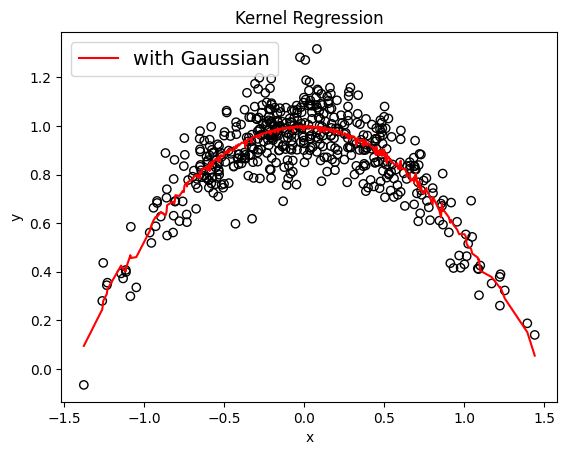

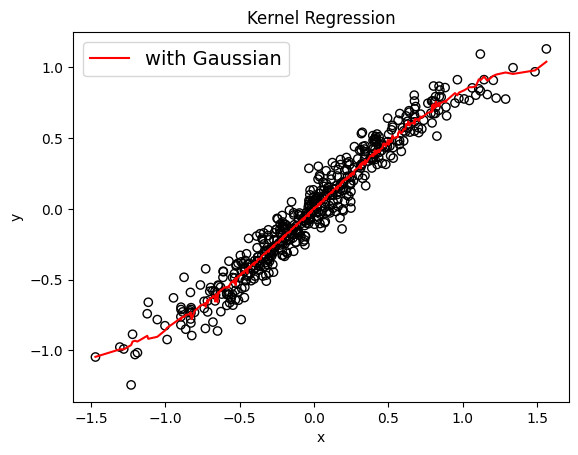

In [595]:
# Plot for x1 and y1
f1_sort = np.array([x for _,x in sorted(zip(x1,func[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort = np.array([x for _,x in sorted(zip(x2,func[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()

### With Random Fourier Features

#### Psi

In [596]:
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        psi_vector[i] = psi(x, w[:, i], b[i])
    return np.array(psi_vector)

def capital_psi(x, w,b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))

capital_psi(x_vector[:, 1], w, b, m, dimension)

array([[ 0.15018214,  0.        ,  1.4125806 ,  0.        ,  0.40162114,
         0.        , -1.30632193, -0.        ,  1.09443355,  0.        ,
        -1.38649745, -0.        ,  1.41360867,  0.        ,  0.83392428,
         0.        , -0.58157072, -0.        , -1.306908  , -0.        ,
        -0.8073541 , -0.        , -0.66489201, -0.        , -0.75683236,
        -0.        ,  1.18486437,  0.        ,  1.16237537,  0.        ,
        -1.39258213, -0.        ,  0.02245199,  0.        , -0.12689811,
        -0.        ,  0.88091664,  0.        ,  0.76336611,  0.        ],
       [ 0.        ,  0.15018214,  0.        ,  1.4125806 ,  0.        ,
         0.40162114, -0.        , -1.30632193,  0.        ,  1.09443355,
        -0.        , -1.38649745,  0.        ,  1.41360867,  0.        ,
         0.83392428, -0.        , -0.58157072, -0.        , -1.306908  ,
        -0.        , -0.8073541 , -0.        , -0.66489201, -0.        ,
        -0.75683236,  0.        ,  1.18486437,  0.

#### Phi

In [597]:
def phi(x, w, b, n, m, dim):
    phi = np.zeros((dim*n, dim*m))
    for i in range(0, n):
        psi = capital_psi(x[:,i], w, b, m, dim)
        phi[dim*i] = psi[0]
        phi[dim*i+1] = psi[1]
    return phi

phi_ = phi(x_vector, w, b, n, m, dimension)
phi_

array([[0.11437056, 0.        , 1.4122385 , ..., 0.        , 0.6340963 ,
        0.        ],
       [0.        , 0.11437056, 0.        , ..., 0.80195518, 0.        ,
        0.6340963 ],
       [0.15018214, 0.        , 1.4125806 , ..., 0.        , 0.76336611,
        0.        ],
       ...,
       [0.        , 0.08732066, 0.        , ..., 0.71288311, 0.        ,
        0.63518354],
       [0.13631981, 0.        , 1.41219024, ..., 0.        , 0.70472   ,
        0.        ],
       [0.        , 0.13631981, 0.        , ..., 0.85324012, 0.        ,
        0.70472   ]])

#### Alpha

In [598]:
def alpha_approx(phi, y, n, dim, m, lam):
    alpha = np.linalg.inv(phi.T @ phi + lam*np.eye(dim*m)) @ (phi.T@y)
    return alpha

alpha_approximation = alpha_approx(phi_, y, n, dimension, m, lam)

#### Function Approximation

In [599]:
def function_approximation(alpha, x, n, dim):
    f = np.zeros((dim, n))
    for i in range(n):
        f[:, i] = capital_psi(x[:, i], w, b, m, dim) @ alpha
    return f

# Evt: Gir samme resultat
def func_2(alpha, phi):
    func = phi @ alpha
    return np.array([func[::2], func[1::2]])

function_estimate = function_approximation(alpha_approximation, x_vector, n, dimension)
function_estimate

array([[ 9.83363876e-01,  9.84445403e-01,  4.11469740e-01,
         9.91189903e-01,  8.99141175e-01,  9.77234769e-01,
         9.65082887e-01,  9.55212514e-01,  8.64258145e-01,
         7.72528260e-01,  7.30686710e-01,  9.45389694e-01,
         9.82914234e-01,  6.49960451e-01,  9.88242318e-01,
         4.73246293e-01,  9.94106570e-01,  7.12363477e-01,
         8.78334356e-01,  9.99288275e-01,  7.18921657e-01,
         8.05101320e-01,  9.90046165e-01,  7.96721440e-01,
         9.63494049e-01,  9.94692093e-01,  8.26368292e-01,
         8.58355554e-01,  8.82980348e-01,  8.37509499e-01,
         9.11860511e-01,  9.13217203e-01,  4.93195763e-01,
         8.54840123e-01,  9.84928901e-01,  8.38157700e-01,
         9.26573070e-01,  8.22510989e-01,  8.50475483e-01,
         9.79670227e-01,  9.85553458e-01,  9.97741247e-01,
         6.83787240e-01,  4.45921247e-01,  9.85751875e-01,
         9.75226951e-01,  9.83929493e-01,  9.68155849e-01,
         8.48411465e-01,  7.49587435e-01,  9.14949339e-0

#### Plot

C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\2328763344.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\vilde\AppData\Local\Temp\ipykernel_20088\2328763344.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


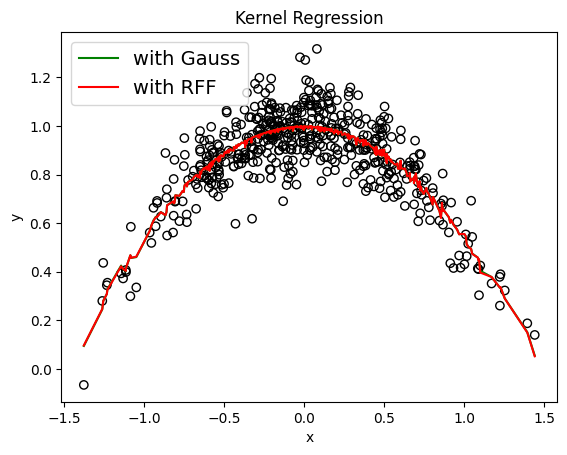

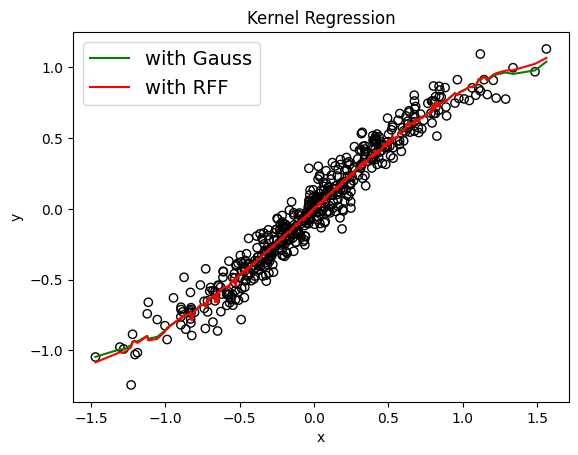

In [600]:
# Plot for x1 and y1
f1_sort_approx = np.array([x for _,x in sorted(zip(x1,function_estimate[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort, c="g", label="with Gauss")
plt.plot(np.sort(x1), f1_sort_approx, c="r", label="with RFF")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort_approx = np.array([x for _,x in sorted(zip(x2,function_estimate[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort, c="g", label="with Gauss")
plt.plot(np.sort(x2), f2_sort_approx, c="r", label="with RFF")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()